<a href="https://colab.research.google.com/github/yjyg1215/Project_Data-Analysis/blob/main/section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주제: 다음 분기에 어떤 게임을 설계해야 할까?
1. 지역에 따라서 선호하는 게임 장르가 다를까?
2. 연도별 게임의 트렌드가 있을까?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
4. 플랫폼 별로 인기 많은 장르가 다를까?

##파일 업로드

In [3]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("vgames2.csv",index_col=0)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


##Topic 1. 지역에 따라서 선호하는 게임 장르가 다를까?

In [3]:
df.duplicated().sum() #중복치 확인

1

In [4]:
df.info() #결측치 및 데이터타입 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


- 중복치 제거
- Year, Genre, Publisher 컬럼에 결측치가 있는 것으로 확인됨.

해당 토픽에서 Year, Publisher 컬럼은 활용하지 않을 것이므로 논외하며,

Genre 컬럼은 50개의 결측치가 존재하지만, 16598개에 비하면 전체의 10% 이하인 매우 작은 수라고 판단하여 Genre 컬럼에 대해서만 결측치 제거 처리를 진행한다.

- Sales 컬럼들의 데이터타입이 object인데 float로 변경한다.


In [5]:
df_t1=df.drop_duplicates() #중복치 제거 (df_t1: 토픽1에서 사용할 데이터프레임)
df_t1.reset_index(drop=True,inplace=True) #인덱스 재정렬
df_t1.shape

(16597, 9)

In [6]:
df_t1=df_t1.dropna(subset=['Genre']) #Genre 컬럼 결측치 제거
df_t1.reset_index(drop=True,inplace=True) #인덱스 재정렬
df_t1.shape

(16547, 9)

In [7]:
df_t1['NA_Sales']=df_t1['NA_Sales'].str.replace('K','000') #Sales 컬럼들을 float형태로 바꾸기 전에 문자들 먼저 처리하기
df_t1['EU_Sales']=df_t1['EU_Sales'].str.replace('K','000')
df_t1['JP_Sales']=df_t1['JP_Sales'].str.replace('K','000')
df_t1['Other_Sales']=df_t1['Other_Sales'].str.replace('K','000')

df_t1['NA_Sales']=df_t1['NA_Sales'].str.replace('M','')
df_t1['EU_Sales']=df_t1['EU_Sales'].str.replace('M','')
df_t1['JP_Sales']=df_t1['JP_Sales'].str.replace('M','')
df_t1['Other_Sales']=df_t1['Other_Sales'].str.replace('M','')

In [8]:
df_t1=df_t1.astype({'NA_Sales':'float','EU_Sales':'float','JP_Sales':'float','Other_Sales':'float'}) #Sales 컬럼들 float형태로 변환

In [9]:
df_t1['NA_Sales']=df_t1['NA_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x) #Sales 컬럼들에서 문자 K를 가지고 있던 행들은 문자 처리때 '000'을 붙여주고 백만으로 나누는 처리를 진행함.
df_t1['EU_Sales']=df_t1['EU_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x)
df_t1['JP_Sales']=df_t1['JP_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x)
df_t1['Other_Sales']=df_t1['Other_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x)

In [10]:
sales_genre=df_t1[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']] #Sales 컬럼들과 Genre 컬럼만 따로 뺀 데이터프레임 생성
sales_genre_mean=sales_genre.groupby('Genre').mean() #Genre 컬럼으로 groupby한 데이터프레임 생성
sales_genre_mean

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264693,0.157991,0.047776,0.056415
Adventure,0.082547,0.050039,0.040586,0.013133
Fighting,0.263518,0.119504,0.103117,0.043259
Misc,0.235323,0.122468,0.060709,0.042699
Platform,0.505023,0.228066,0.147794,0.058292
Puzzle,0.213408,0.087768,0.098391,0.021661
Racing,0.287361,0.190748,0.045374,0.062027
Role-Playing,0.215469,0.123790,0.232603,0.038409
Shooter,0.445233,0.239518,0.029273,0.078539


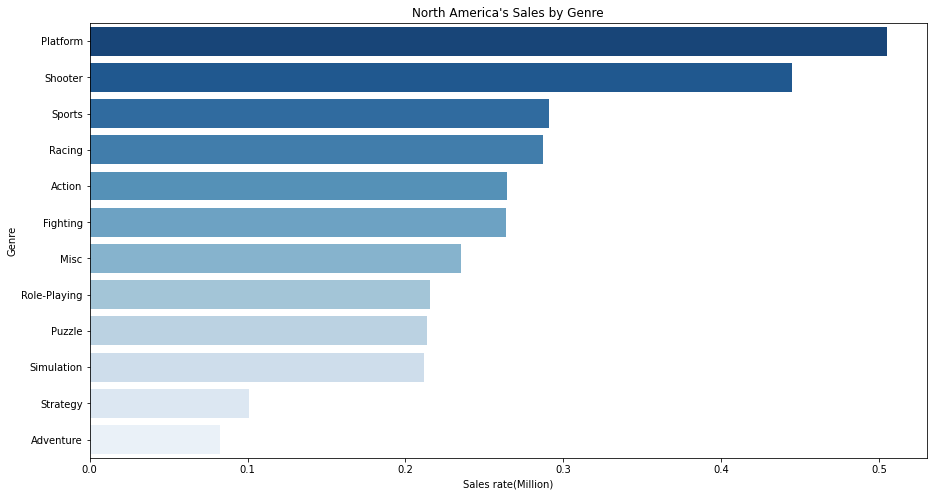

In [11]:
#북아메리카 그래프
NA=sales_genre_mean['NA_Sales'].sort_values(ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(x=NA,y=NA.index,palette='Blues_r')
plt.title("North America's Sales by Genre")
plt.xlabel("Sales rate(Million)")
plt.ylabel("Genre")

plt.savefig('NA.png', transparent = True)

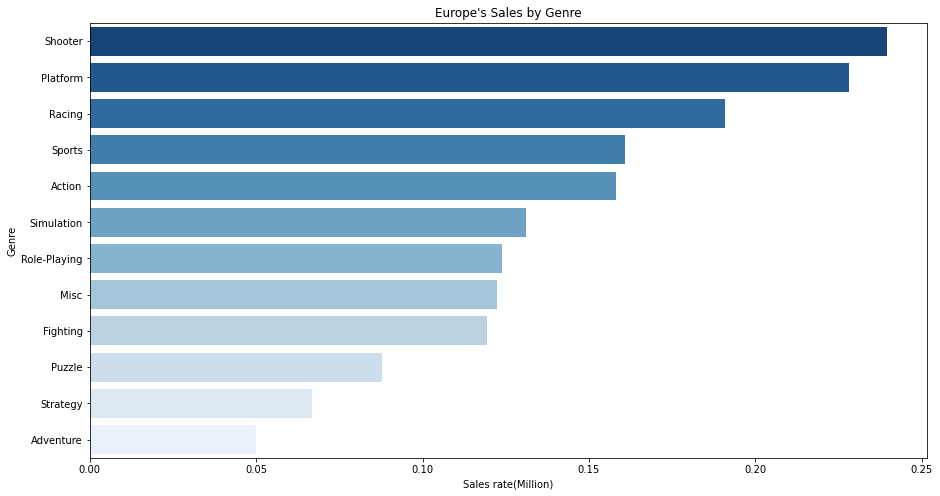

In [12]:
#유럽 그래프
EU=sales_genre_mean['EU_Sales'].sort_values(ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(x=EU,y=EU.index,palette='Blues_r')
plt.title("Europe's Sales by Genre")
plt.xlabel("Sales rate(Million)")
plt.ylabel("Genre")

plt.savefig('EU.png', transparent = True)

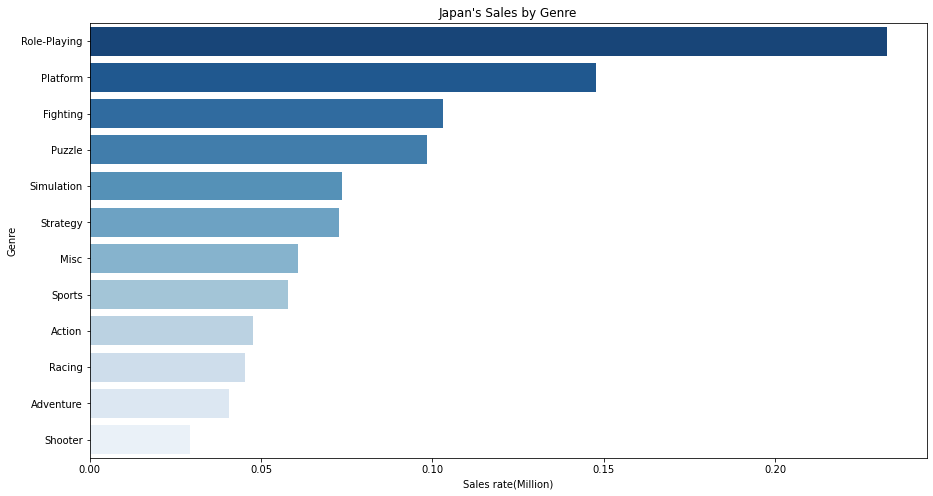

In [13]:
#일본 그래프
JP=sales_genre_mean['JP_Sales'].sort_values(ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(x=JP,y=JP.index,palette='Blues_r')
plt.title("Japan's Sales by Genre")
plt.xlabel("Sales rate(Million)")
plt.ylabel("Genre")

plt.savefig('JP.png', transparent = True)

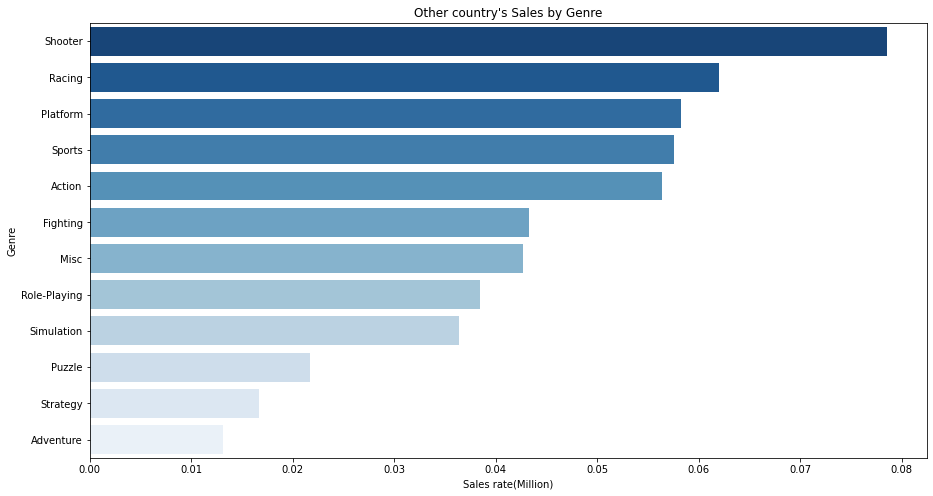

In [14]:
#이외 국가 그래프
Other=sales_genre_mean['Other_Sales'].sort_values(ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(x=Other,y=Other.index,palette='Blues_r')
plt.title("Other country's Sales by Genre")
plt.xlabel("Sales rate(Million)")
plt.ylabel("Genre")

plt.savefig('Other.png', transparent = True)

##Topic 2. 연도별 게임의 트렌드가 있을까?

앞서 토픽1에서 결측치가 있는 컬럼으로 Year, Genre, Publisher가 확인됐다.

이번 토픽2에서는 Year, Genre, Publisher 모두 활용할 예정이므로 결측치 처리를 진행할 것이며,

결측치를 가진 총 row 수가 전체 row 수의 10% 이하이므로 결측치 삭제 방식으로 처리를 진행한다.

In [15]:
df_t2=df.drop_duplicates() #중복치 제거 (df_t2: 토픽2에서 사용할 데이터프레임)
df_t2.reset_index(drop=True,inplace=True) #인덱스 재정렬
df_t2.shape

(16597, 9)

In [16]:
df_t2=df_t2.dropna(subset=['Year','Genre','Publisher']) #결측치 제거
df_t2.reset_index(drop=True,inplace=True) #인덱스 재정렬
df_t2.shape

(16241, 9)

In [18]:
df_t2['NA_Sales']=df_t2['NA_Sales'].str.replace('K','000') #Sales 컬럼들을 float형태로 바꾸기 전에 문자들 먼저 처리하기
df_t2['EU_Sales']=df_t2['EU_Sales'].str.replace('K','000')
df_t2['JP_Sales']=df_t2['JP_Sales'].str.replace('K','000')
df_t2['Other_Sales']=df_t2['Other_Sales'].str.replace('K','000')

df_t2['NA_Sales']=df_t2['NA_Sales'].str.replace('M','')
df_t2['EU_Sales']=df_t2['EU_Sales'].str.replace('M','')
df_t2['JP_Sales']=df_t2['JP_Sales'].str.replace('M','')
df_t2['Other_Sales']=df_t2['Other_Sales'].str.replace('M','')

df_t2=df_t2.astype({'NA_Sales':'float','EU_Sales':'float','JP_Sales':'float','Other_Sales':'float'}) #Sales 컬럼들 float형태로 변환

df_t2['NA_Sales']=df_t2['NA_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x) #Sales 컬럼들에서 문자 K를 가지고 있던 행들은 문자 처리때 '000'을 붙여주고 백만으로 나누는 처리를 진행함.
df_t2['EU_Sales']=df_t2['EU_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x)
df_t2['JP_Sales']=df_t2['JP_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x)
df_t2['Other_Sales']=df_t2['Other_Sales'].apply(lambda x:(x/1000000) if x>=1000 else x)

###a) 연도와 플랫폼

In [ ]:
year_platform=df_t2[['Year','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']] #Year, Platform, Sales 컬럼만 담은 데이터프레임 생성

